In [0]:
!pip install kaggle

In [0]:
!mkdir ../root/.kaggle/

In [0]:
#kindly upload you kaggle.json API file
import shutil
shutil.copy("kaggle.json","../root/.kaggle/kaggle.json")

'../root/.kaggle/kaggle.json'

In [0]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 46.0MB/s]
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 63.3MB/s]
100% 1.56G/1.56G [00:28<00:00, 56.1MB/s]
100% 1.56G/1.56G [00:28<00:00, 59.0MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 434kB/s]


In [0]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
import pandas as pd
data = pd.read_csv("train.csv")

In [0]:
import pandas as pd
import numpy as np
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [0]:
!pip install geopy

In [0]:
from geopy.distance import geodesic,great_circle

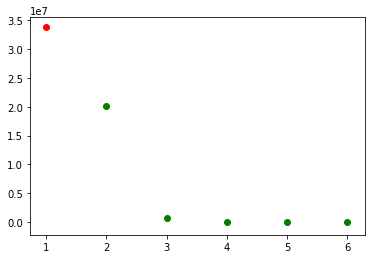

In [0]:
import matplotlib.pyplot as plt
plt.scatter(1,data2[data2.fare_amount < 10].fare_amount.count(),c="r")
plt.scatter(2,data2[(data2.fare_amount > 10) & (data2.fare_amount < 50) ].fare_amount.count(),c="g")
plt.scatter(3,data2[(data2.fare_amount > 50) & (data2.fare_amount < 100) ].fare_amount.count(),c="g")
plt.scatter(4,data2[(data2.fare_amount > 100) & (data2.fare_amount < 500) ].fare_amount.count(),c="g")
plt.scatter(5,data2[(data2.fare_amount > 500) & (data2.fare_amount < 1000) ].fare_amount.count(),c="g")
plt.scatter(6,data2[(data2.fare_amount > 1000) ].fare_amount.count(),c="g")

plt.show()


In [0]:
data = data[data.fare_amount >= 0]
data = data.dropna()

In [0]:
# data.to_csv("processed_train_data.csv",index=None)

In [0]:
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data = data.reset_index()
# data.to_csv("training_data.csv",index=None)

In [0]:
import pandas as pd
data2 = pd.read_csv("training_data.csv")

In [0]:
data2 = data.drop(["key"],axis=1)
data2.head()

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [0]:
data2 = reduce_mem_usage(data2)

In [0]:
# x1,y1 = data2.pickup_latitude[0],data2.pickup_longitude[0]
# x2,y2 = data2.dropoff_latitude[0],data2.dropoff_longitude[0]

# print(distance((x1,y1),(x2,y2)))
# print(great_circle_distance(x1,y1,x2,y2))
# print(geodesic_distance(x1,y1,x2,y2))

In [0]:
data2.head()

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [0]:
data2 = data2[(data2.pickup_longitude <= 90) & (data2.pickup_longitude >= -90)]
data2 = data2[(data2.pickup_latitude <= 90) & (data2.pickup_latitude >= -90)]
data2 = data2[(data2.dropoff_longitude <= 90) & (data2.dropoff_longitude >= -90)]
data2 = data2[(data2.dropoff_latitude <= 90) & (data2.dropoff_latitude >= -90)]

In [0]:
from geopy.distance import geodesic,great_circle
def geodesic_distance(x1,y1,x2,y2):
  return geodesic((x1,y1),(x2,y2))

def great_circle_distance(x1,y1,x2,y2):
  return great_circle((x1,y1),(x2,y2))

def distance(origin, destination):
    import math
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [0]:
data2 = data2[data2.fare_amount <= 100].dropna()

In [0]:
data2.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.539715e+07,5.539715e+07,5.539715e+07,5.539715e+07,5.539715e+07,5.539715e+07,5.539715e+07
mean,2.771197e+07,1.129277e+01,-7.250123e+01,3.991912e+01,-7.250606e+01,3.992161e+01,1.685480e+00
std,1.599949e+07,9.410433e+00,1.044542e+01,6.107921e+00,1.042609e+01,6.100679e+00,1.326884e+00
min,0.000000e+00,0.000000e+00,-8.993333e+01,-7.783387e+01,-8.996667e+01,-7.418663e+01,0.000000e+00
25%,1.385595e+07,6.000000e+00,-7.399207e+01,4.073494e+01,-7.399140e+01,4.073404e+01,1.000000e+00
50%,2.771197e+07,8.500000e+00,-7.398181e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,4.156800e+07,1.250000e+01,-7.396709e+01,4.076713e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,5.542386e+07,1.000000e+02,8.570278e+01,8.974216e+01,8.570278e+01,8.981667e+01,2.080000e+02


In [0]:
data2.columns

Index(['index', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [0]:
#sample Check
testing_data = data2[:500000]

In [0]:
import time
from datetime import datetime
from tqdm import tqdm
print("Started at ",datetime.now())
start = time.time()
al = []

for index,row in tqdm(testing_data.iterrows()):

  al.append(data2.iloc[index:index+1].apply(lambda x:"{0:.2f}".format(
      float(str((geodesic_distance(x.pickup_latitude,
                                  x.pickup_longitude,
                                  x.dropoff_latitude,
                                  x.dropoff_longitude
                                  ))).split(" ")[0]))
  ,axis=1))

end = time.time()

print("time taken",(end-start)/60)

# data2['geo_centric'] = data2.apply(lambda x:great_circle_distance(
#     x.pickup_latitude,x.pickup_longitude,x.dropoff_latitude,x.dropoff_longitude
# ),axis=1)

1it [00:00,  5.91it/s]

Started at  2019-12-06 12:59:11.246024


500000it [13:23, 622.45it/s]

time taken 13.392701065540313


In [0]:
testing_data

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
500230,500256,13.5,2014-03-06 00:16:00+00:00,-73.995847,40.759165,-74.000470,40.719872,5
500231,500257,19.0,2014-06-09 01:59:40+00:00,-73.989738,40.757047,-74.010661,40.711412,4
500232,500258,4.9,2010-03-30 12:14:13+00:00,-73.949165,40.773303,-73.953259,40.765016,1
500233,500259,4.5,2010-08-10 23:10:00+00:00,-73.973687,40.763232,-73.972853,40.754732,1


In [0]:
testing_data = testing_data.drop(["index"],axis=1).reset_index()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [0]:
x = testing_data.drop(["fare_amount","pickup_datetime"],axis=1)
x = x.drop(["index"],axis=1)
y = testing_data[["fare_amount"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [0]:
model = LinearRegression()
model.fit(x_train,y_train)
print("Linear Regression testing")
print("Training Score",model.score(x_train,y_train))
print("Testing Score",model.score(x_test,y_test))

Training Score 0.0003729824283968952
Testing Score 0.00023725662542073425


In [0]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
print("Decision Tree testing")
print("Training Score",model.score(x_train,y_train))
print("Testing Score",model.score(x_test,y_test))

Training Score 0.9774799768014172
Testing Score 0.6488024068540741


In [0]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(x_train,y_train)
print("Light Gradient Boosting testing")
print("Training Score",model.score(x_train,y_train))
print("Testing Score",model.score(x_test,y_test))

Training Score 0.7945471346229904
Testing Score 0.796505269286971


In [0]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)
print("XGBoost testing")
print("Training Score",model.score(x_train,y_train))
print("Testing Score",model.score(x_test,y_test))

[13:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score 0.7491787601409472
Testing Score 0.753737086307197
